In [1]:
import tensorflow
print(tensorflow.__version__)

2.12.0-rc1


# Data Preprocessing

In [2]:
import cv2,os
data_path='dataset1/'
categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'normal': 0, 'potholes': 1}
['normal', 'potholes']
[0, 1]


In [3]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



# Recale and assign  catagorical labels

In [4]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

# CNN Model

In [5]:
data.shape

(722, 256, 256, 1)

In [6]:
data.shape[1:]

(256, 256, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(2,activation='sigmoid'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

# Splitting data into traning and testing

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

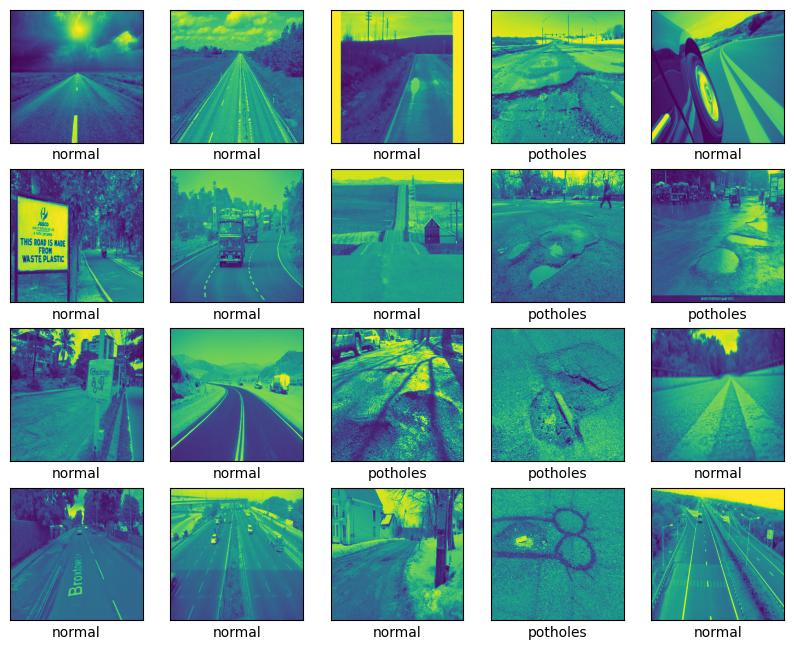

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [23]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
19/19 [==============================] - 50s 3s/step - loss: 0.1708 - accuracy: 0.9349 - val_loss: 0.5089 - val_accuracy: 0.7538
Epoch 2/10
19/19 [==============================] - 48s 2s/step - loss: 0.1709 - accuracy: 0.9366 - val_loss: 0.6559 - val_accuracy: 0.7692
Epoch 3/10
19/19 [==============================] - 52s 3s/step - loss: 0.0531 - accuracy: 0.9863 - val_loss: 0.8197 - val_accuracy: 0.8308
Epoch 4/10
19/19 [==============================] - 49s 3s/step - loss: 0.0733 - accuracy: 0.9743 - val_loss: 0.5607 - val_accuracy: 0.8308
Epoch 5/10
19/19 [==============================] - 53s 3s/step - loss: 0.0264 - accuracy: 0.9949 - val_loss: 0.7017 - val_accuracy: 0.8462
Epoch 6/10
19/19 [==============================] - 52s 3s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.1245 - val_accuracy: 0.8308
Epoch 7/10
19/19 [==============================] - 52s 3s/step - loss: 0.0077 - accuracy: 0.9966 - val_loss: 1.0723 - val_accuracy: 0.8308
Epoch 8/10
19/19 [==

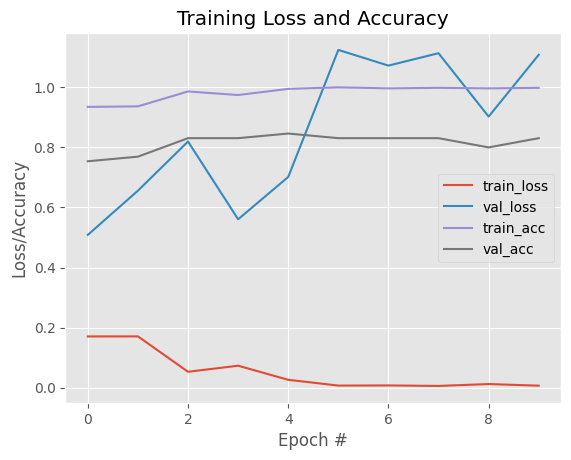

In [24]:
# # plot the training loss and accuracy
N = 10 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model1")

1/1 [==============================] - 0s 110ms/step
A.I predicts: potholes
Correct prediction for label 1 is potholes


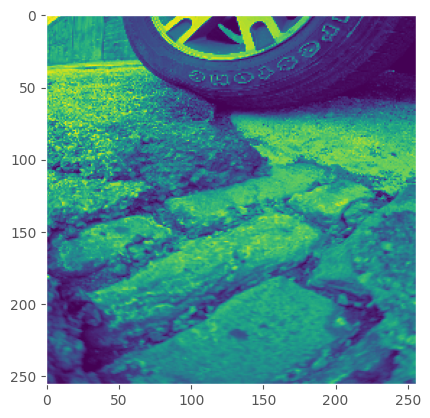

In [25]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

3/3 [==============================] - 2s 542ms/step


<Figure size 640x480 with 0 Axes>

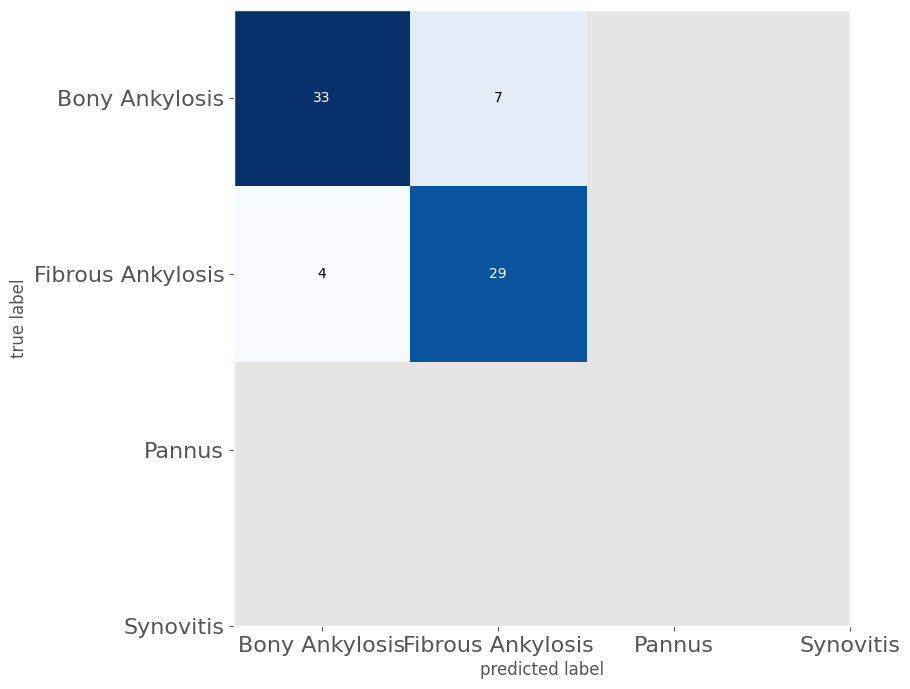

In [26]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(4), ['Bony Ankylosis','Fibrous Ankylosis','Pannus','Synovitis'], fontsize=16)
plt.yticks(range(4), ['Bony Ankylosis','Fibrous Ankylosis','Pannus','Synovitis'], fontsize=16)
plt.show()

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score

report = classification_report(test_labels, predictions, target_names=categories)
print(report)

              precision    recall  f1-score   support

      normal       0.89      0.82      0.86        40
    potholes       0.81      0.88      0.84        33

    accuracy                           0.85        73
   macro avg       0.85      0.85      0.85        73
weighted avg       0.85      0.85      0.85        73

